## wt_a2 vs wt_a4 vs ws_4hr_PopP2

### wt_a2 vs wt_a4

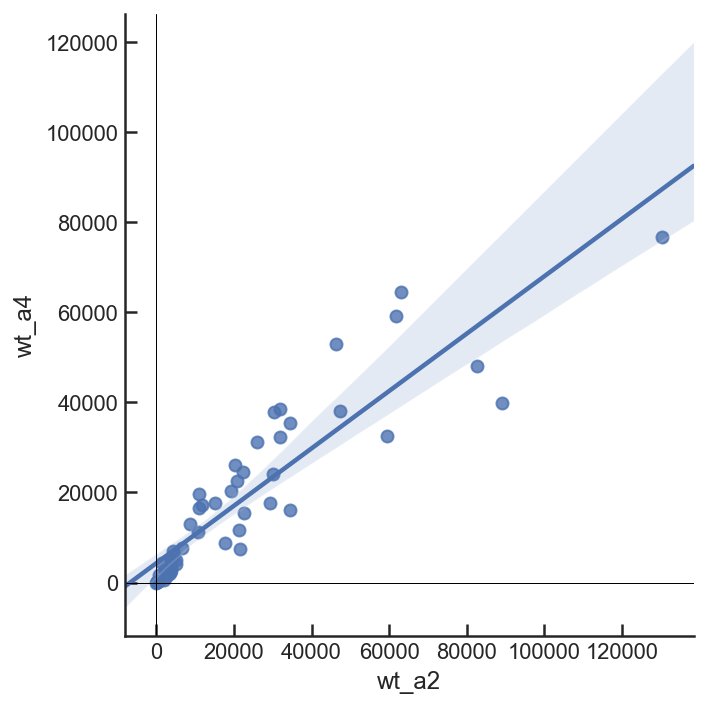

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


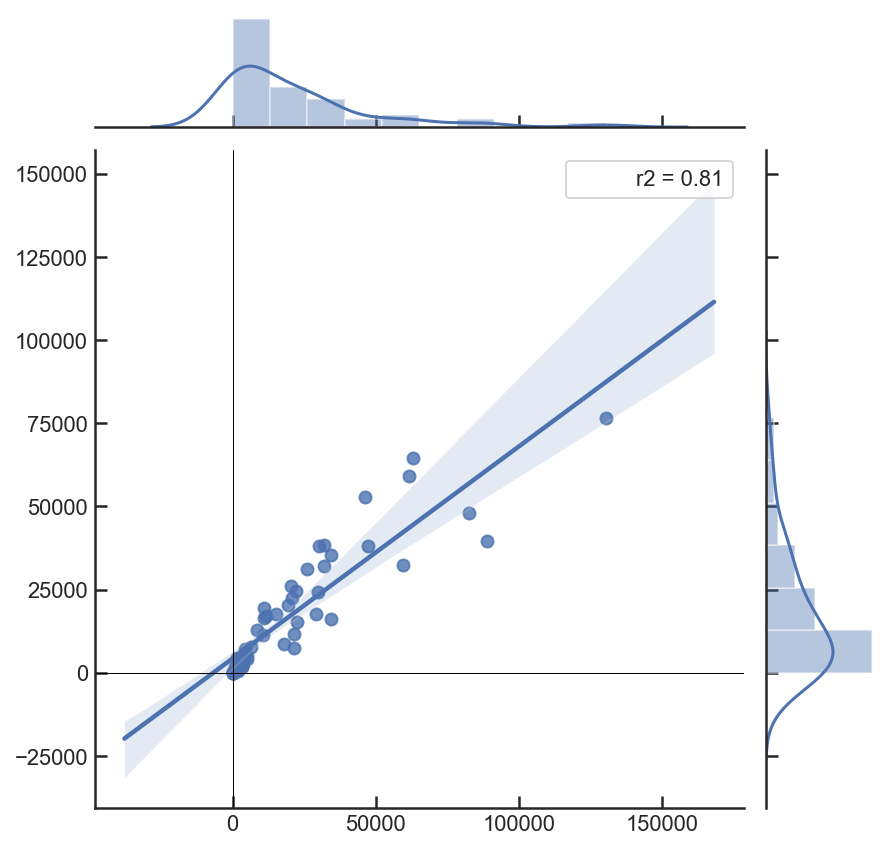

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

RNA_seq = pd.read_csv("../data/extracted_original_TPM_mean_values.csv",index_col=0)
Cap_seq = pd.read_csv("../data/rna_seq_normalized_count_in_mRNA.csv",index_col=0)

Ws_4h_PopP2 = RNA_seq["Ws-0_4hr-PopP2"]
wt_a2 = Cap_seq.loc[:,["wt_a2_r1", "wt_a2_r2", "wt_a2_r3"]].mean(axis=1)
wt_a4 = Cap_seq.loc[:,["wt_a4_r1", "wt_a4_r2", "wt_a4_r3"]].mean(axis=1)

data=pd.DataFrame()
data["wt_a2"] = wt_a2
data["wt_a4"] = wt_a4

sns.set_style("ticks")
sns.set_style({'xtick.direction': 'in',
               'ytick.direction': 'in',
               'font.sans-serif': ['Arial']})
sns.lmplot(x="wt_a2", y="wt_a4", data=data)
plt.axhline(0, color="black", lw=0.5)
plt.axvline(0, color="black", lw=0.5)
plt.show()

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(wt_a2, wt_a4, kind="reg", stat_func=r2)
plt.axhline(0, color="black", lw=0.5)
plt.axvline(0, color="black", lw=0.5)
plt.show()

### wt_a2 vs wt_a4 vs ws_4hr_PopP2

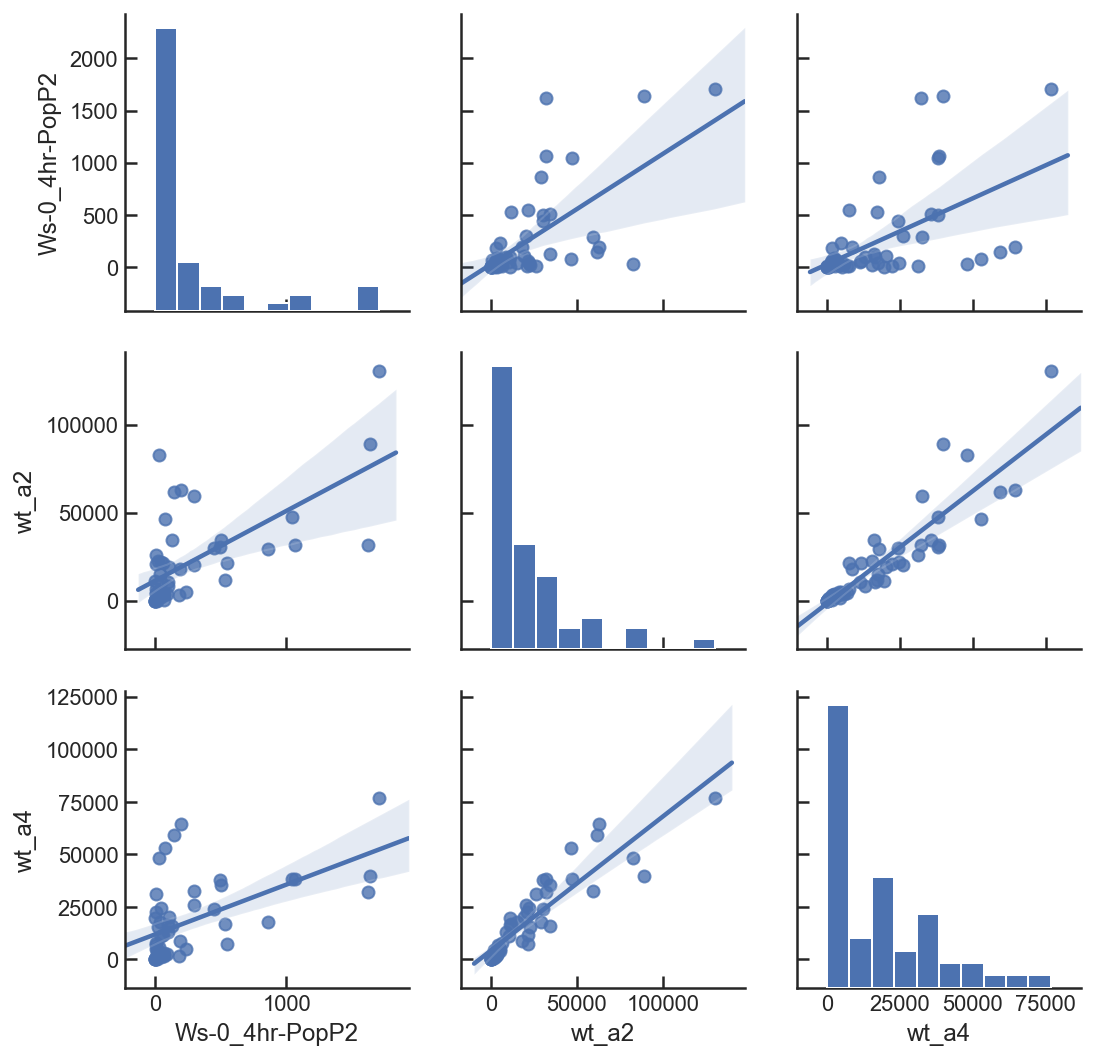

In [2]:
data=pd.DataFrame()
data["Ws-0_4hr-PopP2"] = Ws_4h_PopP2
data["wt_a2"] = wt_a2
data["wt_a4"] = wt_a4

sns.pairplot(data=data, kind="reg")

In [3]:
### calculate R^2 values

from sklearn import linear_model
clf = linear_model.LinearRegression()

for pair in [["wt_a2", "wt_a4"], ["wt_a2", "Ws-0_4hr-PopP2"], ["wt_a4", "Ws-0_4hr-PopP2"]]: 
    X = data.loc[:, [pair[0]]].as_matrix()
    Y = data[pair[1]].as_matrix()
    clf.fit(X, Y)
    print(pair[0], "vs", pair[1], ":",clf.score(X, Y))

wt_a2 vs wt_a4 : 0.8133226049046718
wt_a2 vs Ws-0_4hr-PopP2 : 0.4190352867578244
wt_a4 vs Ws-0_4hr-PopP2 : 0.2999732406876888


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
